In [4]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import pickle as pk
import gensim
from nltk.util import ngrams
from collections import Counter
import collections.abc
collections.Mapping = collections.abc.Mapping
import shifterator as sh
import matplotlib.pyplot as plt
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta
import seaborn as sns
from collections import defaultdict
data_dir = "./data/"

In [21]:
with open("data/subreddits-list.txt", "r") as f:
    lines = f.readlines()
lines.sort()

In [23]:
with open("data/subreddits-list.txt", 'w') as f:
    for line in lines:
        f.write(f"{line}")

## preprocessing

In [2]:
from preprocess import preprocess

import string
def count_ngrams(input_texts, n=1):
    ngrams_counter = Counter()
    for text in input_texts:
        #text = preprocess(text) # input text already preprocessed so comment this step out
        text_ngrams = ngrams(word_tokenize(text), n)
        ngrams_counter.update(text_ngrams)
    return ngrams_counter   

def get_ngrams_counter(subreddit, utt_fp, start_month, last_month):
    usecols=['year-month', 'text']
    comments_df = pk.load(open(utt_fp, "rb"))
    comments_df = comments_df[usecols]

    ngrams_counter = dict()

    m = start_month
    while m <= last_month:
        print("\t", m)
        monthly_comments = comments_df[comments_df['year-month'] == m]['text'].tolist()
        ngrams_counter[m] = count_ngrams(monthly_comments)

        m = (parse(m) + relativedelta(months=1)).strftime("%Y-%m")
    return ngrams_counter

In [3]:
# subreddit_ngrams_counter = dict()
# for subreddit in ['Judaism', 'Buddhism', 'Christianity']:
#     print(subreddit)
#     subreddit_ngrams_counter[subreddit] = get_ngrams_counter(subreddit)
# pk.dump(subreddit_ngrams_counter, open(data_dir + "subreddit_ngrams_counter.pk", "wb"))

In [14]:
subreddit_ngrams_counter = pk.load(open(data_dir + "subreddit_ngrams_counter.pk", "rb"))

In [4]:
start_month = "2014-01"
last_month = "2018-10"

for subreddit in ['movies']:
    print(subreddit)
    subreddit_ngrams_counter[subreddit] = get_ngrams_counter(subreddit, start_month, last_month)


movies
	 2014-01
	 2014-02
	 2014-03
	 2014-04
	 2014-05
	 2014-06
	 2014-07
	 2014-08
	 2014-09
	 2014-10
	 2014-11
	 2014-12
	 2015-01
	 2015-02
	 2015-03
	 2015-04
	 2015-05
	 2015-06
	 2015-07
	 2015-08
	 2015-09
	 2015-10
	 2015-11
	 2015-12
	 2016-01
	 2016-02
	 2016-03
	 2016-04
	 2016-05
	 2016-06
	 2016-07
	 2016-08
	 2016-09
	 2016-10
	 2016-11
	 2016-12
	 2017-01
	 2017-02
	 2017-03
	 2017-04
	 2017-05
	 2017-06
	 2017-07
	 2017-08
	 2017-09
	 2017-10
	 2017-11
	 2017-12
	 2018-01
	 2018-02
	 2018-03
	 2018-04
	 2018-05
	 2018-06
	 2018-07
	 2018-08
	 2018-09
	 2018-10


In [5]:
subreddit_ngrams_counter.keys()

dict_keys(['Judaism', 'Buddhism', 'Christianity', 'tennis', 'worldnews', 'snowboarding', 'movies'])

In [6]:
pk.dump(subreddit_ngrams_counter, open(data_dir + "subreddit_ngrams_counter.pk", "wb"))

## JSD

In [7]:
import metrics

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
subreddit_jsd_diffs = pk.load(open(data_dir + "subreddit_jsd_diffs.pk", "rb"))

In [9]:
# subreddit_ngrams_counter = pk.load(open(data_dir + "subreddit_ngrams_counter.pk", "rb"))

In [10]:
from itertools import combinations
all_months = subreddit_ngrams_counter['tennis'].keys()
month_pairs = list(combinations(all_months, r=2))

In [11]:
for month_1, month_2 in month_pairs:
    print(month_1, month_2)
    break

2014-01 2014-02


In [12]:
for subreddit in ['movies']:
    print(subreddit)
    jsd_diffs = defaultdict(dict)
    for month_1, month_2 in month_pairs:
        print("\t", month_1, month_2)

        my_jsd = metrics.JSD(subreddit_ngrams_counter[subreddit][month_1], 
                           subreddit_ngrams_counter[subreddit][month_2],   
                           weight_1 = 0.5, weight_2 = 0.5, 
                           base=2)

        jsd_diffs[month_1][month_2] = my_jsd.total_diff
    subreddit_jsd_diffs[subreddit] = jsd_diffs

movies
	 2014-01 2014-02
	 2014-01 2014-03
	 2014-01 2014-04
	 2014-01 2014-05
	 2014-01 2014-06
	 2014-01 2014-07
	 2014-01 2014-08
	 2014-01 2014-09
	 2014-01 2014-10
	 2014-01 2014-11
	 2014-01 2014-12
	 2014-01 2015-01
	 2014-01 2015-02
	 2014-01 2015-03
	 2014-01 2015-04
	 2014-01 2015-05
	 2014-01 2015-06
	 2014-01 2015-07
	 2014-01 2015-08
	 2014-01 2015-09
	 2014-01 2015-10
	 2014-01 2015-11
	 2014-01 2015-12
	 2014-01 2016-01
	 2014-01 2016-02
	 2014-01 2016-03
	 2014-01 2016-04
	 2014-01 2016-05
	 2014-01 2016-06
	 2014-01 2016-07
	 2014-01 2016-08
	 2014-01 2016-09
	 2014-01 2016-10
	 2014-01 2016-11
	 2014-01 2016-12
	 2014-01 2017-01
	 2014-01 2017-02
	 2014-01 2017-03
	 2014-01 2017-04
	 2014-01 2017-05
	 2014-01 2017-06
	 2014-01 2017-07
	 2014-01 2017-08
	 2014-01 2017-09
	 2014-01 2017-10
	 2014-01 2017-11
	 2014-01 2017-12
	 2014-01 2018-01
	 2014-01 2018-02
	 2014-01 2018-03
	 2014-01 2018-04
	 2014-01 2018-05
	 2014-01 2018-06
	 2014-01 2018-07
	 2014-01 2018-08
	 2

	 2014-09 2017-01
	 2014-09 2017-02
	 2014-09 2017-03
	 2014-09 2017-04
	 2014-09 2017-05
	 2014-09 2017-06
	 2014-09 2017-07
	 2014-09 2017-08
	 2014-09 2017-09
	 2014-09 2017-10
	 2014-09 2017-11
	 2014-09 2017-12
	 2014-09 2018-01
	 2014-09 2018-02
	 2014-09 2018-03
	 2014-09 2018-04
	 2014-09 2018-05
	 2014-09 2018-06
	 2014-09 2018-07
	 2014-09 2018-08
	 2014-09 2018-09
	 2014-09 2018-10
	 2014-10 2014-11
	 2014-10 2014-12
	 2014-10 2015-01
	 2014-10 2015-02
	 2014-10 2015-03
	 2014-10 2015-04
	 2014-10 2015-05
	 2014-10 2015-06
	 2014-10 2015-07
	 2014-10 2015-08
	 2014-10 2015-09
	 2014-10 2015-10
	 2014-10 2015-11
	 2014-10 2015-12
	 2014-10 2016-01
	 2014-10 2016-02
	 2014-10 2016-03
	 2014-10 2016-04
	 2014-10 2016-05
	 2014-10 2016-06
	 2014-10 2016-07
	 2014-10 2016-08
	 2014-10 2016-09
	 2014-10 2016-10
	 2014-10 2016-11
	 2014-10 2016-12
	 2014-10 2017-01
	 2014-10 2017-02
	 2014-10 2017-03
	 2014-10 2017-04
	 2014-10 2017-05
	 2014-10 2017-06
	 2014-10 2017-07
	 2014-10 

	 2015-07 2018-10
	 2015-08 2015-09
	 2015-08 2015-10
	 2015-08 2015-11
	 2015-08 2015-12
	 2015-08 2016-01
	 2015-08 2016-02
	 2015-08 2016-03
	 2015-08 2016-04
	 2015-08 2016-05
	 2015-08 2016-06
	 2015-08 2016-07
	 2015-08 2016-08
	 2015-08 2016-09
	 2015-08 2016-10
	 2015-08 2016-11
	 2015-08 2016-12
	 2015-08 2017-01
	 2015-08 2017-02
	 2015-08 2017-03
	 2015-08 2017-04
	 2015-08 2017-05
	 2015-08 2017-06
	 2015-08 2017-07
	 2015-08 2017-08
	 2015-08 2017-09
	 2015-08 2017-10
	 2015-08 2017-11
	 2015-08 2017-12
	 2015-08 2018-01
	 2015-08 2018-02
	 2015-08 2018-03
	 2015-08 2018-04
	 2015-08 2018-05
	 2015-08 2018-06
	 2015-08 2018-07
	 2015-08 2018-08
	 2015-08 2018-09
	 2015-08 2018-10
	 2015-09 2015-10
	 2015-09 2015-11
	 2015-09 2015-12
	 2015-09 2016-01
	 2015-09 2016-02
	 2015-09 2016-03
	 2015-09 2016-04
	 2015-09 2016-05
	 2015-09 2016-06
	 2015-09 2016-07
	 2015-09 2016-08
	 2015-09 2016-09
	 2015-09 2016-10
	 2015-09 2016-11
	 2015-09 2016-12
	 2015-09 2017-01
	 2015-09 

	 2016-10 2018-01
	 2016-10 2018-02
	 2016-10 2018-03
	 2016-10 2018-04
	 2016-10 2018-05
	 2016-10 2018-06
	 2016-10 2018-07
	 2016-10 2018-08
	 2016-10 2018-09
	 2016-10 2018-10
	 2016-11 2016-12
	 2016-11 2017-01
	 2016-11 2017-02
	 2016-11 2017-03
	 2016-11 2017-04
	 2016-11 2017-05
	 2016-11 2017-06
	 2016-11 2017-07
	 2016-11 2017-08
	 2016-11 2017-09
	 2016-11 2017-10
	 2016-11 2017-11
	 2016-11 2017-12
	 2016-11 2018-01
	 2016-11 2018-02
	 2016-11 2018-03
	 2016-11 2018-04
	 2016-11 2018-05
	 2016-11 2018-06
	 2016-11 2018-07
	 2016-11 2018-08
	 2016-11 2018-09
	 2016-11 2018-10
	 2016-12 2017-01
	 2016-12 2017-02
	 2016-12 2017-03
	 2016-12 2017-04
	 2016-12 2017-05
	 2016-12 2017-06
	 2016-12 2017-07
	 2016-12 2017-08
	 2016-12 2017-09
	 2016-12 2017-10
	 2016-12 2017-11
	 2016-12 2017-12
	 2016-12 2018-01
	 2016-12 2018-02
	 2016-12 2018-03
	 2016-12 2018-04
	 2016-12 2018-05
	 2016-12 2018-06
	 2016-12 2018-07
	 2016-12 2018-08
	 2016-12 2018-09
	 2016-12 2018-10
	 2017-01 

In [13]:
pk.dump(subreddit_jsd_diffs, open(data_dir + "subreddit_jsd_diffs.pk", "wb"))

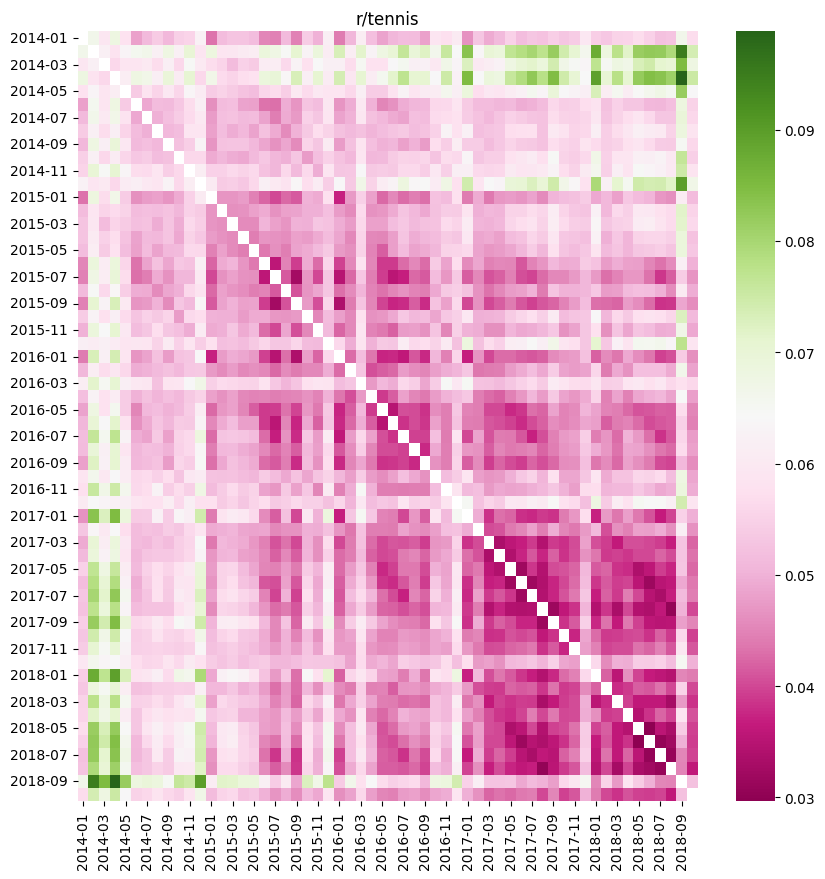

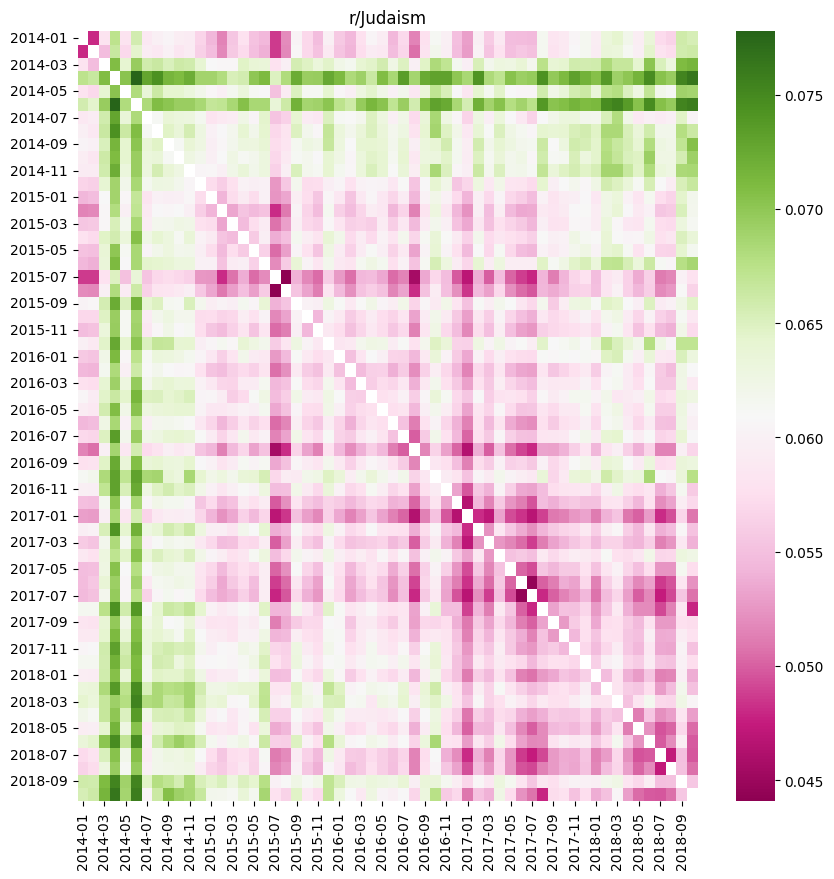

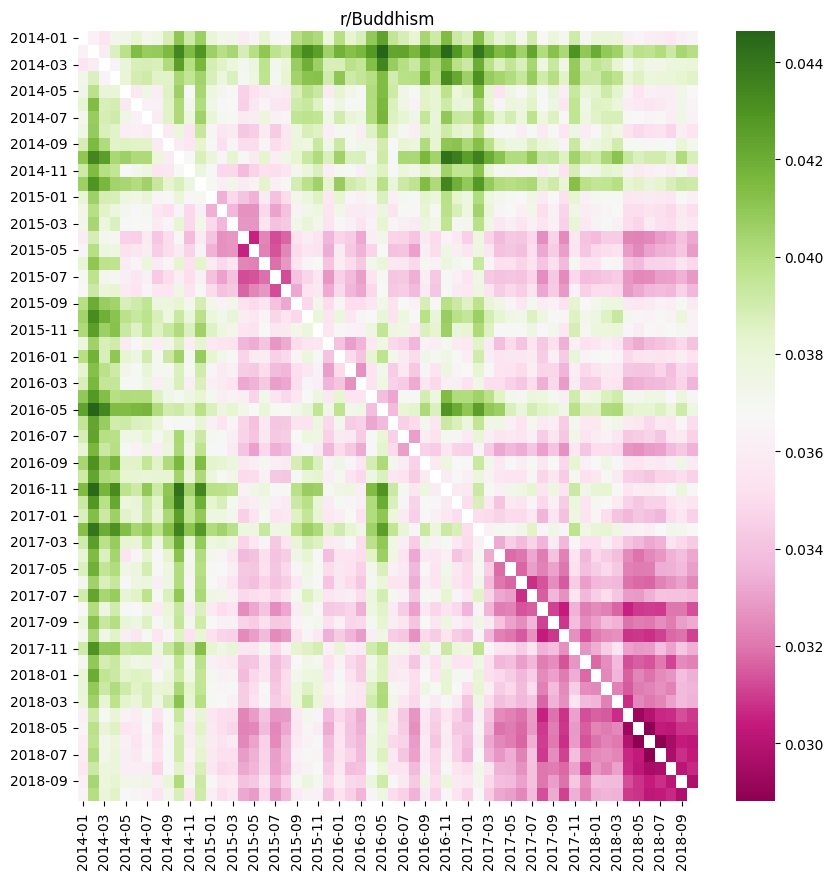

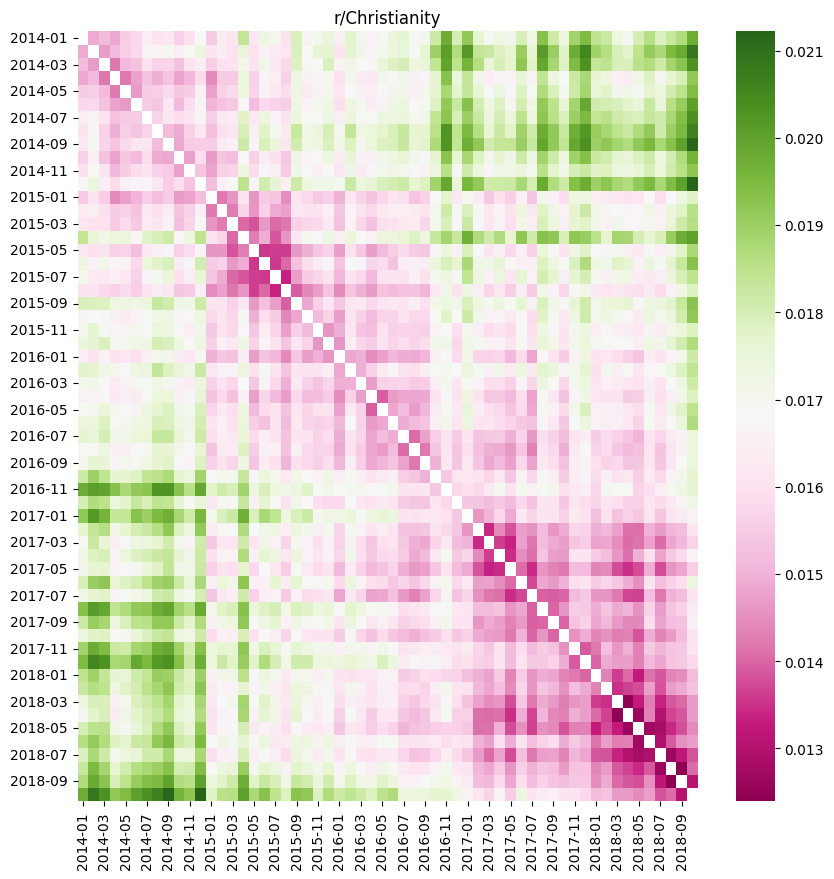

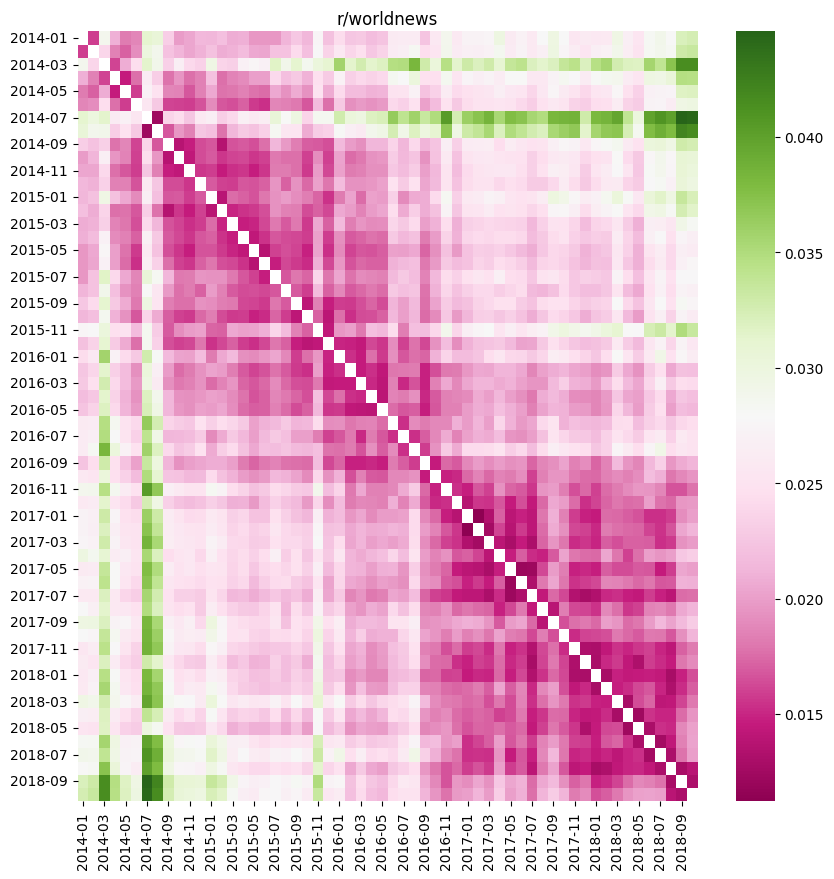

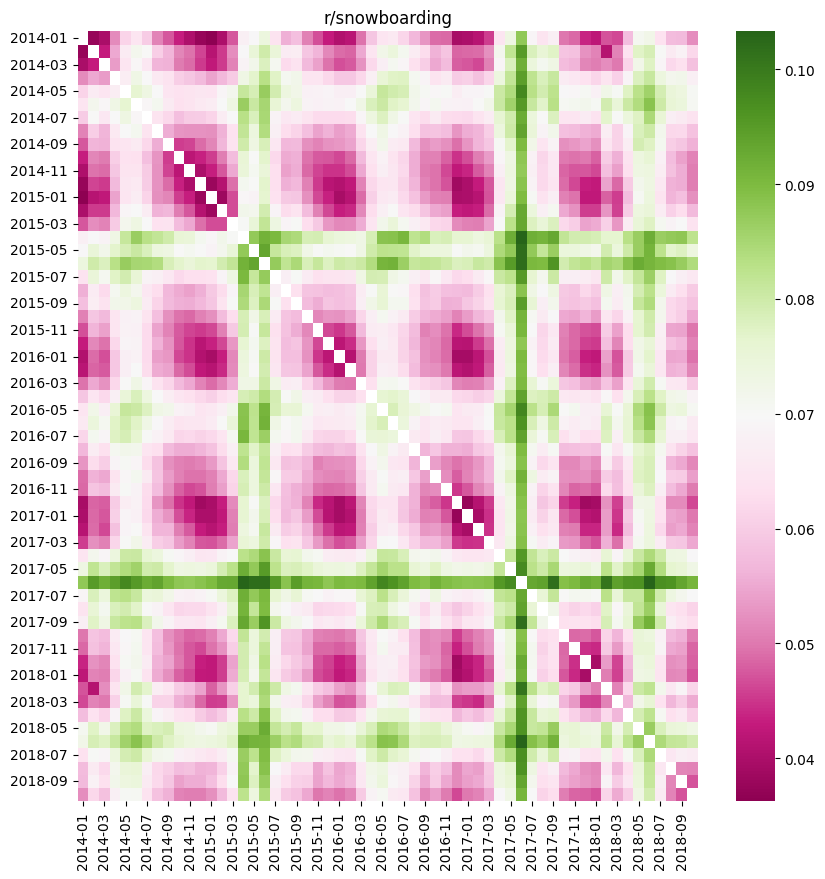

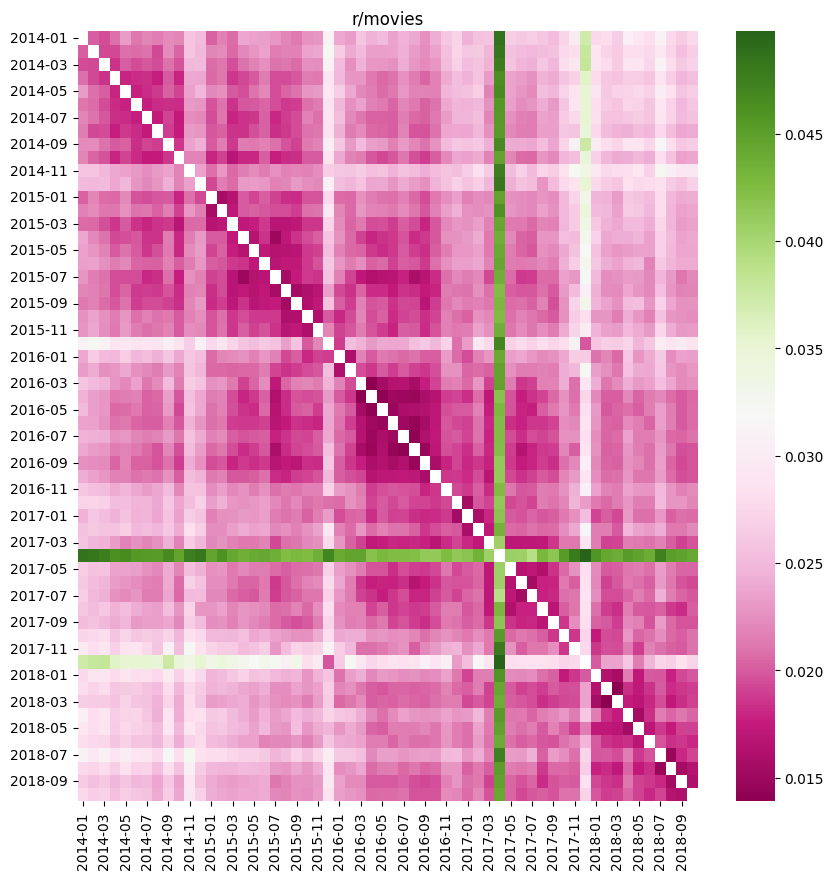

In [10]:
for subreddit in subreddit_jsd_diffs.keys():
    jsd_diffs = subreddit_jsd_diffs[subreddit]
    jsd_df = pd.DataFrame.from_dict(jsd_diffs, orient='index')
    jsd_df.insert(0, "2014-01", np.nan)
    jsd_df = jsd_df.T
    jsd_df.insert(jsd_df.shape[-1], "2018-10", np.nan)
    X = jsd_df.fillna(0).values
    X2 = X + X.T - np.diag(np.diag(X))
    jsd_df = pd.DataFrame(X2, columns = jsd_df.columns, index=jsd_df.index)
    jsd_df = jsd_df.replace(0, np.nan)
    ranked = jsd_df.rank(axis=1)
    plt.figure(figsize=(10, 10))
    sns.heatmap(jsd_df, cmap='PiYG')
    plt.title(f"r/{subreddit}")

In [16]:
subreddit

'movies'

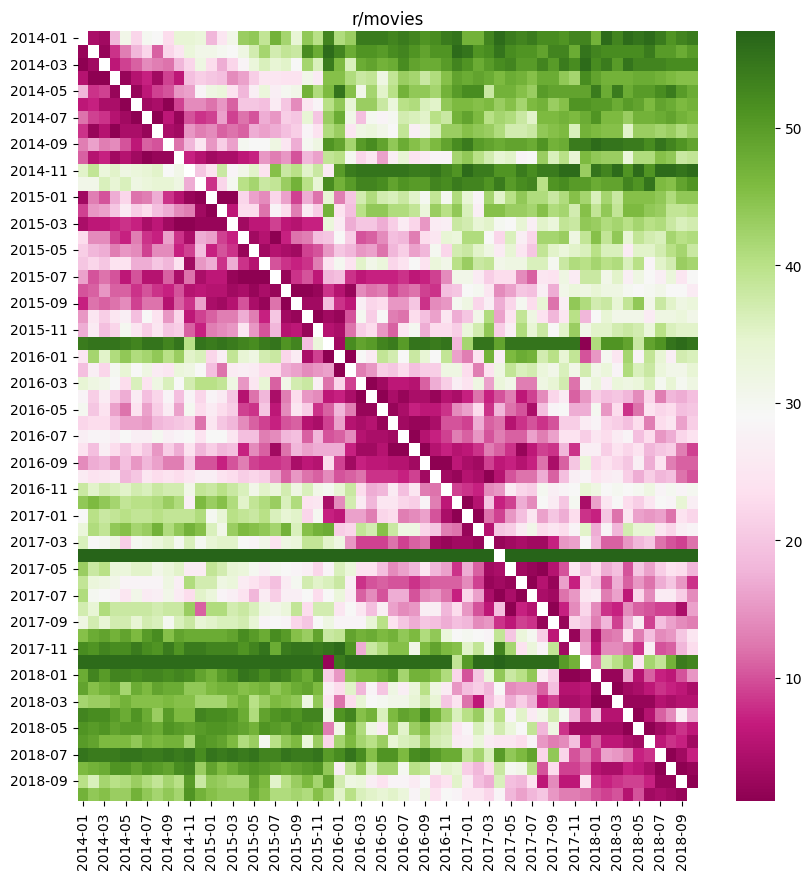

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(ranked.T, cmap='PiYG')
plt.title(f"r/{subreddit}")
plt.savefig(f"figures/{subreddit}_ranking.png")

Text(0.5, 0, 'test month')

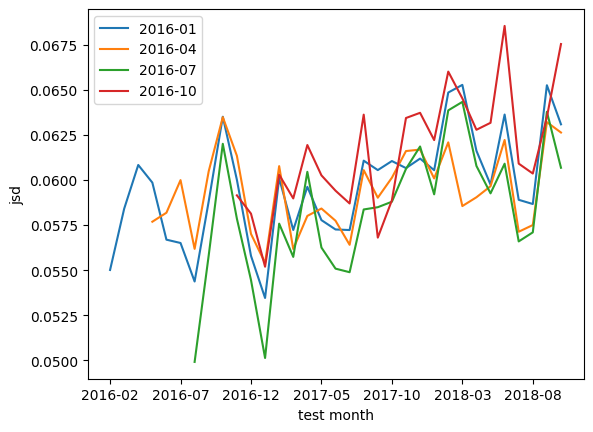

In [607]:
jsd_df.iloc[:, ::3].plot()
plt.ylabel("jsd")
plt.xlabel("test month")

In [ ]:
print(avg_ranks.sort_values("1 year").to_markdown())

In [434]:
print(avg_ranks.sort_values("3 months").to_markdown())

|         |   1 year |   3 months |      EOD |
|:--------|---------:|-----------:|---------:|
| 2016-08 |  1       |    1       |  1.26923 |
| 2016-02 |  2.83333 |    1.33333 |  3.875   |
| 2016-01 |  5.16667 |    2       |  8.57576 |
| 2016-03 |  4.91667 |    2       |  5.87097 |
| 2016-12 |  1.83333 |    2       |  1.81818 |
| 2016-06 |  3.58333 |    2.33333 |  4.10714 |
| 2016-11 |  4.66667 |    2.66667 |  4.17391 |
| 2016-07 |  5.66667 |    3.33333 |  7.25926 |
| 2016-09 |  6.5     |    4       |  8       |
| 2016-04 |  7.75    |    4.66667 |  8.53333 |
| 2016-05 |  7.58333 |    4.66667 |  7.27586 |
| 2016-10 | 10.5     |    9.66667 | 11.0833  |


## JSD word contribution

In [16]:
import metrics

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
def pairwise_comparison(subreddit, month_1, month_2):
    my_jsd = metrics.JSD(subreddit_ngrams_counter[subreddit][month_1], 
                                   subreddit_ngrams_counter[subreddit][month_2],   
                                   weight_1 = 0.5, weight_2 = 0.5, 
                                   base=2)
    contrib = pd.DataFrame.from_dict(my_jsd.item_contribution, orient='index')
    contrib = contrib.sort_values("contribution", ascending=False)[:50]
    contrib['month'] = contrib['from_distribution'].apply(lambda d: month_1 if d == "1" else month_2)
    contrib = contrib.drop("from_distribution", axis=1)
    contrib = contrib.reset_index().rename({"level_0": "item"}, axis=1)
    contrib['comparison'] = f"{month_1} / {month_2}"
    return contrib

In [18]:
from itertools import combinations
all_months = subreddit_jsd_diffs['tennis'].keys()
month_pairs = list(combinations(all_months, r=2))

In [19]:
subreddit = 'snowboarding'
df = pd.DataFrame()
for month_1, month_2 in month_pairs:
    print("\t", month_1, month_2)
    my_jsd = metrics.JSD(subreddit_ngrams_counter[subreddit][month_1], 
                           subreddit_ngrams_counter[subreddit][month_2],   
                           weight_1 = 0.5, weight_2 = 0.5, 
                           base=2)
    contrib = pd.DataFrame.from_dict(my_jsd.item_contribution, orient='index')
    contrib = contrib.sort_values("contribution", ascending=False)[:20]
    contrib['month'] = contrib['from_distribution'].apply(lambda d: month_1 if d == "1" else month_2)
    contrib = contrib.drop("from_distribution", axis=1)
    contrib = contrib.reset_index().rename({"level_0": "item"}, axis=1)
    contrib['comparison'] = f"{month_1} / {month_2}"
    df = pd.concat((df, contrib))
df.to_csv(data_dir + f"/output/jsd_contrib_{subreddit}.csv", index=False)



	 2014-02
	 2014-03
	 2014-04
	 2014-05
	 2014-06
	 2014-07
	 2014-08
	 2014-09
	 2014-10
	 2014-11
	 2014-12
	 2015-01
	 2015-02
	 2015-03
	 2015-04
	 2015-05
	 2015-06
	 2015-07
	 2015-08
	 2015-09
	 2015-10
	 2015-11
	 2015-12
	 2016-01
	 2016-02
	 2016-03
	 2016-04
	 2016-05
	 2016-06
	 2016-07
	 2016-08
	 2016-09
	 2016-10
	 2016-11
	 2016-12
	 2017-01
	 2017-02
	 2017-03
	 2017-04
	 2017-05
	 2017-06
	 2017-07
	 2017-08
	 2017-09
	 2017-10
	 2017-11
	 2017-12
	 2018-01
	 2018-02
	 2018-03
	 2018-04
	 2018-05
	 2018-06
	 2018-07
	 2018-08
	 2018-09
	 2014-03
	 2014-04
	 2014-05
	 2014-06
	 2014-07
	 2014-08
	 2014-09
	 2014-10
	 2014-11
	 2014-12
	 2015-01
	 2015-02
	 2015-03
	 2015-04
	 2015-05
	 2015-06
	 2015-07
	 2015-08
	 2015-09
	 2015-10
	 2015-11
	 2015-12
	 2016-01
	 2016-02
	 2016-03
	 2016-04
	 2016-05
	 2016-06
	 2016-07
	 2016-08
	 2016-09
	 2016-10
	 2016-11
	 2016-12
	 2017-01
	 2017-02
	 2017-03
	 2017-04
	 2017-05
	 2017-06
	 2017-07
	 2017-08
	 2017-09
	 2017-10


	 2015-12
	 2016-01
	 2016-02
	 2016-03
	 2016-04
	 2016-05
	 2016-06
	 2016-07
	 2016-08
	 2016-09
	 2016-10
	 2016-11
	 2016-12
	 2017-01
	 2017-02
	 2017-03
	 2017-04
	 2017-05
	 2017-06
	 2017-07
	 2017-08
	 2017-09
	 2017-10
	 2017-11
	 2017-12
	 2018-01
	 2018-02
	 2018-03
	 2018-04
	 2018-05
	 2018-06
	 2018-07
	 2018-08
	 2018-09
	 2015-08
	 2015-09
	 2015-10
	 2015-11
	 2015-12
	 2016-01
	 2016-02
	 2016-03
	 2016-04
	 2016-05
	 2016-06
	 2016-07
	 2016-08
	 2016-09
	 2016-10
	 2016-11
	 2016-12
	 2017-01
	 2017-02
	 2017-03
	 2017-04
	 2017-05
	 2017-06
	 2017-07
	 2017-08
	 2017-09
	 2017-10
	 2017-11
	 2017-12
	 2018-01
	 2018-02
	 2018-03
	 2018-04
	 2018-05
	 2018-06
	 2018-07
	 2018-08
	 2018-09
	 2015-09
	 2015-10
	 2015-11
	 2015-12
	 2016-01
	 2016-02
	 2016-03
	 2016-04
	 2016-05
	 2016-06
	 2016-07
	 2016-08
	 2016-09
	 2016-10
	 2016-11
	 2016-12
	 2017-01
	 2017-02
	 2017-03
	 2017-04
	 2017-05
	 2017-06
	 2017-07
	 2017-08
	 2017-09
	 2017-10
	 2017-11
	 2017-12


In [187]:
with pd.ExcelWriter(data_dir + 'output/word_contribution.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='Sheet_name_1')
    df2.to_excel(writer, sheet_name='Sheet_name_2')
    
    for subreddit in ['Judaism', 'Buddhism', 'Christianity']:
        df = pd.read_csv(data_dir + f"/output/jsd_contrib_{subreddit}.csv")
        output = df.groupby(["comparison", 'month'])['item'].apply(lambda x: ", ".join(x))
        output.to_excel(writer, sheet_name = subreddit)
        
        